# Chi-squared rozdeleni $\chi^2(k)$

Rozdeleni chi-squared s parametrem $k$ je rozdeleni definovane jako suma ctvercu $k$ nezavislych standardne normalnych nahodych velicin:

$$Q = \sum_{i = 1}Z_i^2.$$

Pomoci momentove metody budeme odhadovat parametr $k$.
Protoze mame jenom jeden parametr, bude nam bude stacit jenom prvni moment $\mu \equiv {\rm E}[Q] = g(k) = k$. Predpokladejme, ze mame $n$ vzorku s hodnotami $x_1,\dots,x_n$ a necht $$\widehat{\mu} = \frac{1}{n} \sum_{1}^nx_i.$$ je prvni sample moment (sample mean). Estimator $\widehat{k}$ pro parameter $k$ dany momentovou metodou je resenim (v tomhle pripade) jedne rovnice:
$$\widehat{\mu} = g(\widehat{k}) = \widehat{k}.$$

Jinymi slovy, momentova metoda nam dava estimator
$$\widehat{k} = \frac{1}{n} \sum_{1}^nX_i,$$
kde $X_i$ jsou z rodeleni chi-squared.



In [1]:
import numpy as np

def estimate_chisquare(k = 2, sample_size = 100000):
    sample_mean = 0
    for i in range(sample_size):
        x = np.random.chisquare(k)
        sample_mean += x
    sample_mean /= sample_size
    return sample_mean

In [2]:
estimate_chisquare(2)

2.006987866371571

In [3]:
estimate_chisquare(3)

3.0008170599900845

In [4]:
estimate_chisquare(10)

9.996025462036357

Vidime, ze momentova metoda nam dava celkem dobre odhady parametru.
Ted budeme opakovat funkci `estimate_chisquare` pro hodnotu `k = 2` a vysledek znazornime v histogramu.
Tim ziskame rozdeleni nahodne veliciny $\widehat{k}$. Vysledek muzeme znozornit pomoci histogramu.

In [5]:
def chisquare_estimator_distribution(sample_size = 100000):
    dist = []
    for i in range(sample_size):
        dist.append(estimate_chisquare(2))
    return np.array(dist)

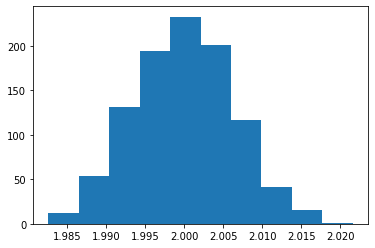

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
number_of_simulations = 1000
estimates = chisquare_estimator_distribution(number_of_simulations)
ax.hist(estimates)
plt.show()

In [7]:
import math
import scipy.stats as stats

def confidance_intervals(estimates, number_of_simulations, alpha=0.975):
    low = estimates - stats.norm.ppf(alpha) * estimates/math.sqrt(number_of_simulations)
    high = estimates + stats.norm.ppf(alpha) * estimates/math.sqrt(number_of_simulations)
    
    return (low, high)

Ted spocteme konfidencni intervaly:

In [8]:
low, high = confidance_intervals(estimates, number_of_simulations)

Dostali sme presne `number_of_simulations` konfidencnich intervalu.
Pro kazdy `estimates[i]` mame konfidencni interval `(low[i], high[i])`.
Ted skontolujeme kolik z techle intervalu obsahuji hodnotu `k = 2`.

In [10]:
count = 0
for i in range(len(low)):
    if low[i] <= 2 <= high[i]:
        count += 1
print(count)

1000
